# Practica 2.1 - Deteccion de Anomalias

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import random

In [2]:
data_normales = pd.read_excel("estaturas.xlsx",sheet_name=0)
data_normales

,Estatura(metros),Edad(años)
0,1.77,26.0
1,1.74,31.0
2,1.72,24.0
3,1.78,34.0
4,1.65,32.0
5,1.66,29.0
6,1.64,27.0
7,1.85,34.0
8,1.85,26.0
9,1.75,21.0


In [3]:
data_anomalias_valtest = pd.read_excel("estaturas.xlsx",sheet_name=2)
data_anomalias_valtest

,Estatura,Edad
0,0.25,2019-04-02 00:00:00
1,175.10,2019-05-02 00:00:00
2,0.15,250.0
3,150.00,14.0


In [4]:
data_normales_valtest = pd.read_excel("estaturas.xlsx",sheet_name=1)
data_normales_valtest

,Estatura(metros),Edad(años)
0,1.82,25.0
1,1.80,27.0
2,1.60,31.0
3,1.60,35.0
4,1.82,30.0
5,1.76,32.0
6,1.79,31.0
7,1.61,31.0


In [5]:
traning_set = data_normales
traning_set.head()

,Estatura(metros),Edad(años)
0,1.77,26.0
1,1.74,31.0
2,1.72,24.0
3,1.78,34.0
4,1.65,32.0


In [6]:
normales_set = data_normales_valtest
normales_set.head()

,Estatura(metros),Edad(años)
0,1.82,25.0
1,1.80,27.0
2,1.60,31.0
3,1.60,35.0
4,1.82,30.0


In [7]:
anomalias_set = data_anomalias_valtest
anomalias_set.head()

,Estatura,Edad
0,0.25,2019-04-02 00:00:00
1,175.10,2019-05-02 00:00:00
2,0.15,250.0
3,150.00,14.0


In [8]:
from datetime import datetime, date 
def age(born): 
    today = date.today() 
    return today.year - born.year - ((today.month,  
                                      today.day) <(born.month,  
                                                    born.day)) 
anomalias_set.iloc[0,1] = age(anomalias_set.iloc[0,1])
anomalias_set.iloc[1,1] = age(anomalias_set.iloc[1,1])



In [9]:
anomalias_set.head()

,Estatura,Edad
0,0.25,3
1,175.10,3
2,0.15,250.0
3,150.00,14.0


#### Organizacion de datos de cross validation y test

In [10]:
from sklearn.model_selection import train_test_split 
normales_validation, normales_testing = train_test_split(normales_set, test_size = 0.50)

anomalias_validation, anomalias_testing = train_test_split(anomalias_set, test_size = 0.50)

In [11]:
normales_validation

,Estatura(metros),Edad(años)
0,1.82,25.0
5,1.76,32.0
1,1.80,27.0
4,1.82,30.0


In [12]:
normales_testing

,Estatura(metros),Edad(años)
7,1.61,31.0
3,1.60,35.0
2,1.60,31.0
6,1.79,31.0


In [13]:
anomalias_validation

,Estatura,Edad
0,0.25,3
1,175.10,3


In [14]:
anomalias_testing

,Estatura,Edad
3,150.00,14.0
2,0.15,250.0


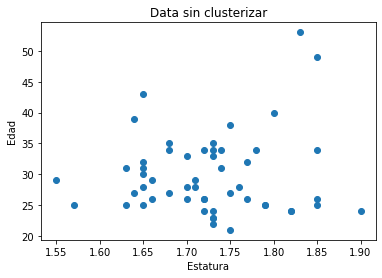

In [15]:
plt.scatter(traning_set.iloc[:, 0] , traning_set.iloc[:, 1])
plt.xlabel('Estatura')
plt.ylabel('Edad')
plt.title('Data sin clusterizar')
plt.show()

In [16]:
covarianza = np.cov(traning_set.T)
covarianza

array([[5.47888244e-03, 4.60776488e-02],
       [4.60776488e-02, 4.21792453e+01]])

In [17]:
media = np.mean(traning_set)
media

C:\Users\huber\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Estatura(metros)     1.724340
Edad(años)          29.886792
dtype: float64

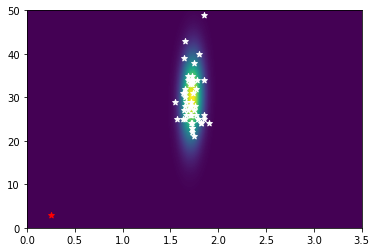

In [23]:
from scipy.stats import multivariate_normal
m_n = multivariate_normal(mean=media, cov=covarianza)

x,y = np.meshgrid(np.linspace(0, 30, 1000), np.linspace(0, 50, 1000))
z = np.empty(x.shape + (2,))
z[:, :, 0] = x
z[:, :, 1] = y

plt.xlim(0,3.5)
plt.ylim(0, 50)
plt.contourf(x, y, m_n.pdf(z), 500)
plt.scatter(traning_set.iloc[:,0], traning_set.iloc[:,1], marker='*', color='white')
plt.scatter(data_anomalias_valtest.iloc[:,0], data_anomalias_valtest.iloc[:,1], marker = '*', color = 'red')

In [21]:
data_anomalias_valtest.iloc[:,1]

0        3
1        3
2    250.0
3     14.0
Name: Edad, dtype: object

C:\Users\huber\AppData\Local\Temp\ipykernel_15660\1726441957.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


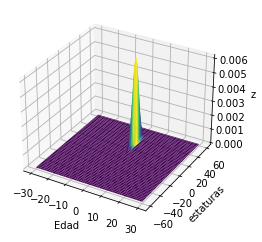

In [29]:
from mpl_toolkits.mplot3d import axes3d
x, y = np.meshgrid(np.linspace(-30, 30, 100), np.linspace(-60, 60, 100))
z = np.empty(x.shape + (2, ))
z[:, :, 0] = x
z[:, :, 1] = y
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, m_n.pdf(z), cmap = 'viridis', linewidth = 0)
ax.set_xlabel('Edad')
ax.set_ylabel('estaturas')
ax.set_zlabel('z')
plt.show()

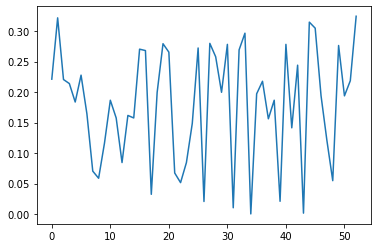

In [30]:
# Sin anomalias
plt.plot(m_n.pdf(data_normales) )
plt.show()

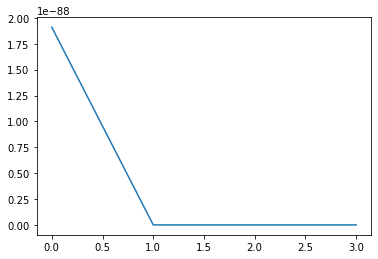

In [31]:
# con anomalias
plt.plot(m_n.pdf(anomalias_set))

## Deteccion de anomalias

In [34]:
def detectar_anomalia(data, param):
    if m_n.pdf(data) < param:
        print('ANOMALA')
    else:
        print('NORMAL')

In [35]:
# Probando con mi estatura y edad
yo = [1.75, 26]
detectar_anomalia(yo, 0.01)

NORMAL


In [36]:
# Probando un dato random sin cooerencia
dato_random = [3.05, 15]
detectar_anomalia(dato_random, 0.01)

ANOMALA
